### Использование на реальных данных

In [44]:
import os
import torch
from torchvision import transforms
from PIL import Image
import pandas as pd
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Параметры
image_folder = "2018"  # Путь к папке с изображениями
model_name = "goida.pth"  # Имя предобученной модели ViT
output_csv = "classification_results_2018.csv"  # Имя файла с результатами

# Загрузка предобученной модели и feature extractor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTForImageClassification.from_pretrained(model_name).to(device)
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-384")

# Предобработка изображений
transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
])

# Классификация изображений
results = []
for image_name in os.listdir(image_folder):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder, image_name)
        image = Image.open(image_path).convert("RGB")
        
        # Предобработка
        input_tensor = transform(image).unsqueeze(0).to(device)
        
        # Предсказание
        with torch.no_grad():
            outputs = model(input_tensor)
            predicted_class = outputs.logits.argmax(-1).item()
        
        # Сохранение результатов
        class_label = "АКР" if predicted_class == 1 else "не АКР"
        results.append({"image_name": image_name, "class": class_label})

# Сохранение результатов в DataFrame
df = pd.DataFrame(results)
df.to_csv(output_csv, index=False)

print(f"Классификация завершена. Результаты сохранены в {output_csv}.")


Классификация завершена. Результаты сохранены в classification_results_2018.csv.


In [106]:
df = pd.read_csv(output_csv)

In [108]:
source_df = pd.read_csv("2018_data.csv")
source_df['class'] = (source_df.index // 32) * 32

In [110]:
df

,image_name,class
0,spectrogram_0.png,не АКР
1,spectrogram_100000.png,не АКР
2,spectrogram_100032.png,не АКР
3,spectrogram_100064.png,не АКР
4,spectrogram_100096.png,не АКР
...,...,...
16334,spectrogram_99840.png,не АКР
16335,spectrogram_99872.png,не АКР
16336,spectrogram_99904.png,не АКР
16337,spectrogram_99936.png,не АКР


In [113]:
df["block"] = df["image_name"].apply(lambda x: int(x.split("_")[1].split(".")[0]))

In [114]:
source_df["class"] = source_df["class"].astype(str).str.strip()
df["block"] = df["block"].astype(str).str.strip()

In [116]:
kekw_df = source_df.merge(df, left_on="class", right_on="block", how="left")

In [117]:
kekw_df

,20,24,28,32,36,40,44,48,52,56,...,1020,1024,1028,1032,1036,1040,class_x,image_name,class_y,block
0,1.211459,1.242863,1.274267,1.310565,1.427028,2.026944,1.875776,1.748633,1.518465,1.601159,...,1.020323,1.020395,1.020468,1.020541,1.020613,1.020686,0,spectrogram_0.png,не АКР,0
1,1.256393,1.286030,1.315667,1.345305,1.469187,1.593070,1.716953,1.840836,1.705769,1.699628,...,1.021218,1.021742,1.022267,1.022791,1.023316,1.023840,0,spectrogram_0.png,не АКР,0
2,1.016187,1.227373,1.438559,1.649746,1.860932,2.072118,1.795651,1.771425,1.747198,1.722971,...,1.022680,1.022137,1.021594,1.021051,1.020508,1.019965,0,spectrogram_0.png,не АКР,0
3,1.093260,1.175121,1.256982,1.338842,1.420703,1.445271,1.469839,1.494406,1.518974,1.543542,...,1.033921,1.033703,1.033484,1.033265,1.033047,1.032828,0,spectrogram_0.png,не АКР,0
4,1.214218,1.255973,1.297727,1.339481,1.434203,1.528925,1.623646,1.718368,1.562739,1.574075,...,1.021369,1.020814,1.020258,1.019704,1.019149,1.018593,0,spectrogram_0.png,не АКР,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524155,1.011239,1.005713,1.000186,0.994659,0.989132,0.989095,0.989058,0.989021,1.018161,1.016259,...,1.024539,1.024064,1.023590,1.023116,1.022642,1.022168,524128,spectrogram_524128.png,не АКР,524128
524156,1.014948,1.007348,0.999748,0.992148,1.083159,1.174169,1.136871,1.099573,1.062276,1.024978,...,1.023223,1.023123,1.023024,1.022925,1.022825,1.022726,524128,spectrogram_524128.png,не АКР,524128
524157,0.958001,0.985133,1.012266,1.008455,1.004643,1.000832,0.997021,0.998187,0.999354,1.000520,...,1.035279,1.034925,1.034571,1.034216,1.033862,1.033508,524128,spectrogram_524128.png,не АКР,524128
524158,1.020145,1.015583,1.011021,1.006458,1.001896,0.998588,0.995280,0.991972,0.988664,0.992100,...,1.040140,1.040223,1.040305,1.040388,1.040470,1.040552,524128,spectrogram_524128.png,не АКР,524128


In [118]:
kekw_time = None
with open("kekw_time.txt", "r") as f:
    kekw_time = f.read()

In [119]:
import ast
import re

In [120]:
timestamps_raw = re.findall(r"Timestamp\('(.*?)'\)", kekw_time)
timestamps = pd.to_datetime(timestamps_raw)


In [121]:
kekw_df.set_index(timestamps)

,20,24,28,32,36,40,44,48,52,56,...,1020,1024,1028,1032,1036,1040,class_x,image_name,class_y,block
2018-01-01 00:00:30,1.211459,1.242863,1.274267,1.310565,1.427028,2.026944,1.875776,1.748633,1.518465,1.601159,...,1.020323,1.020395,1.020468,1.020541,1.020613,1.020686,0,spectrogram_0.png,не АКР,0
2018-01-01 00:01:30,1.256393,1.286030,1.315667,1.345305,1.469187,1.593070,1.716953,1.840836,1.705769,1.699628,...,1.021218,1.021742,1.022267,1.022791,1.023316,1.023840,0,spectrogram_0.png,не АКР,0
2018-01-01 00:02:30,1.016187,1.227373,1.438559,1.649746,1.860932,2.072118,1.795651,1.771425,1.747198,1.722971,...,1.022680,1.022137,1.021594,1.021051,1.020508,1.019965,0,spectrogram_0.png,не АКР,0
2018-01-01 00:03:30,1.093260,1.175121,1.256982,1.338842,1.420703,1.445271,1.469839,1.494406,1.518974,1.543542,...,1.033921,1.033703,1.033484,1.033265,1.033047,1.032828,0,spectrogram_0.png,не АКР,0
2018-01-01 00:04:30,1.214218,1.255973,1.297727,1.339481,1.434203,1.528925,1.623646,1.718368,1.562739,1.574075,...,1.021369,1.020814,1.020258,1.019704,1.019149,1.018593,0,spectrogram_0.png,не АКР,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:55:30,1.011239,1.005713,1.000186,0.994659,0.989132,0.989095,0.989058,0.989021,1.018161,1.016259,...,1.024539,1.024064,1.023590,1.023116,1.022642,1.022168,524128,spectrogram_524128.png,не АКР,524128
2018-12-31 23:56:30,1.014948,1.007348,0.999748,0.992148,1.083159,1.174169,1.136871,1.099573,1.062276,1.024978,...,1.023223,1.023123,1.023024,1.022925,1.022825,1.022726,524128,spectrogram_524128.png,не АКР,524128
2018-12-31 23:57:30,0.958001,0.985133,1.012266,1.008455,1.004643,1.000832,0.997021,0.998187,0.999354,1.000520,...,1.035279,1.034925,1.034571,1.034216,1.033862,1.033508,524128,spectrogram_524128.png,не АКР,524128
2018-12-31 23:58:30,1.020145,1.015583,1.011021,1.006458,1.001896,0.998588,0.995280,0.991972,0.988664,0.992100,...,1.040140,1.040223,1.040305,1.040388,1.040470,1.040552,524128,spectrogram_524128.png,не АКР,524128


In [122]:
kekw_df.to_csv("2018_results.csv")

# Обработка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


In [6]:
df = pd.read_csv("2018_data.csv")

In [8]:
df

,20,24,28,32,36,40,44,48,52,56,...,1004,1008,1012,1016,1020,1024,1028,1032,1036,1040
0,1.211459,1.242863,1.274267,1.310565,1.427028,2.026944,1.875776,1.748633,1.518465,1.601159,...,1.020032,1.020104,1.020177,1.020250,1.020323,1.020395,1.020468,1.020541,1.020613,1.020686
1,1.256393,1.286030,1.315667,1.345305,1.469187,1.593070,1.716953,1.840836,1.705769,1.699628,...,1.019121,1.019645,1.020169,1.020694,1.021218,1.021742,1.022267,1.022791,1.023316,1.023840
2,1.016187,1.227373,1.438559,1.649746,1.860932,2.072118,1.795651,1.771425,1.747198,1.722971,...,1.024852,1.024309,1.023766,1.023223,1.022680,1.022137,1.021594,1.021051,1.020508,1.019965
3,1.093260,1.175121,1.256982,1.338842,1.420703,1.445271,1.469839,1.494406,1.518974,1.543542,...,1.034796,1.034577,1.034358,1.034140,1.033921,1.033703,1.033484,1.033265,1.033047,1.032828
4,1.214218,1.255973,1.297727,1.339481,1.434203,1.528925,1.623646,1.718368,1.562739,1.574075,...,1.023589,1.023034,1.022479,1.021923,1.021369,1.020814,1.020258,1.019704,1.019149,1.018593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524155,1.011239,1.005713,1.000186,0.994659,0.989132,0.989095,0.989058,0.989021,1.018161,1.016259,...,1.026435,1.025961,1.025487,1.025013,1.024539,1.024064,1.023590,1.023116,1.022642,1.022168
524156,1.014948,1.007348,0.999748,0.992148,1.083159,1.174169,1.136871,1.099573,1.062276,1.024978,...,1.023621,1.023521,1.023422,1.023322,1.023223,1.023123,1.023024,1.022925,1.022825,1.022726
524157,0.958001,0.985133,1.012266,1.008455,1.004643,1.000832,0.997021,0.998187,0.999354,1.000520,...,1.036695,1.036341,1.035987,1.035633,1.035279,1.034925,1.034571,1.034216,1.033862,1.033508
524158,1.020145,1.015583,1.011021,1.006458,1.001896,0.998588,0.995280,0.991972,0.988664,0.992100,...,1.039810,1.039893,1.039975,1.040058,1.040140,1.040223,1.040305,1.040388,1.040470,1.040552


In [32]:
df = pd.read_csv("cv_dfs_4/windowed_df.csv")

In [33]:
df

,Epoch,20,24,28,32,36,40,44,48,52,...,1012,1016,1020,1024,1028,1032,1036,1040,is_AKR,block
0,2020-07-01 00:00:30,1.209854,1.171088,1.132322,1.093556,1.065922,1.038288,1.160374,1.080143,1.075155,...,1.038143,1.038005,1.037867,1.037728,1.037590,1.037451,1.037313,1.037175,False,0
1,2020-07-01 00:01:30,1.505584,1.422156,1.338728,1.255300,1.171872,1.162848,1.153825,1.156014,1.158202,...,1.026189,1.026330,1.026470,1.026610,1.026751,1.026891,1.027031,1.027172,False,0
2,2020-07-01 00:02:30,1.033614,1.082642,1.131670,1.180698,1.189449,1.198200,1.206951,1.215702,1.109579,...,1.028284,1.027160,1.026036,1.024911,1.023787,1.022663,1.021539,1.020415,False,0
3,2020-07-01 00:03:30,1.210025,1.191134,1.172244,1.153354,1.134464,1.115574,1.101998,1.088421,1.074845,...,1.040646,1.041598,1.042551,1.043504,1.044457,1.045410,1.046362,1.047315,False,0
4,2020-07-01 00:01:30,1.505584,1.422156,1.338728,1.255300,1.171872,1.162848,1.153825,1.156014,1.158202,...,1.026189,1.026330,1.026470,1.026610,1.026751,1.026891,1.027031,1.027172,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74135,2020-07-13 23:58:30,1.012193,1.048154,1.084115,1.120076,1.156038,1.121643,1.087248,1.052852,1.018457,...,1.017124,1.016795,1.016465,1.016136,1.015806,1.015477,1.015148,1.014818,True,18533
74136,2020-07-13 23:56:30,0.904674,1.000112,1.095550,1.190988,1.075125,0.959261,1.049772,1.140283,1.230794,...,1.029889,1.029920,1.029951,1.029982,1.030013,1.030044,1.030075,1.030106,True,18534
74137,2020-07-13 23:57:30,1.220148,1.205951,1.191754,1.177557,1.163360,1.062793,0.962226,0.965880,0.969533,...,1.029776,1.029498,1.029220,1.028942,1.028664,1.028387,1.028109,1.027831,True,18534
74138,2020-07-13 23:58:30,1.012193,1.048154,1.084115,1.120076,1.156038,1.121643,1.087248,1.052852,1.018457,...,1.017124,1.016795,1.016465,1.016136,1.015806,1.015477,1.015148,1.014818,True,18534


In [31]:
df.drop_duplicates()

,filename,is_AKR
0,spectrograms/spectrogram_0.png,False
4,spectrograms/spectrogram_4.png,False
8,spectrograms/spectrogram_8.png,False
12,spectrograms/spectrogram_12.png,False
16,spectrograms/spectrogram_16.png,False
...,...,...
74120,spectrograms/spectrogram_74120.png,True
74124,spectrograms/spectrogram_74124.png,True
74128,spectrograms/spectrogram_74128.png,True
74132,spectrograms/spectrogram_74132.png,True


In [7]:
df = pd.read_csv("../../../../data/data_1 (2020)/df_with_size_4.csv")
time_series = df.iloc[:, :-3].to_numpy()

In [6]:
time_series = df.to_numpy()

In [11]:
time_series.shape

(524160, 256)

In [ ]:
# df_kek = pd.read_csv("cv_dfs_16/windowed_df_16.csv")
# time_series_kek = df_kek.iloc[:, 1:-2].to_numpy()

In [35]:
df["is_AKR"].value_counts()

is_AKR
False    51492
True     22648
Name: count, dtype: int64

In [13]:
df

,20,24,28,32,36,40,44,48,52,56,...,1004,1008,1012,1016,1020,1024,1028,1032,1036,1040
0,1.211459,1.242863,1.274267,1.310565,1.427028,2.026944,1.875776,1.748633,1.518465,1.601159,...,1.020032,1.020104,1.020177,1.020250,1.020323,1.020395,1.020468,1.020541,1.020613,1.020686
1,1.256393,1.286030,1.315667,1.345305,1.469187,1.593070,1.716953,1.840836,1.705769,1.699628,...,1.019121,1.019645,1.020169,1.020694,1.021218,1.021742,1.022267,1.022791,1.023316,1.023840
2,1.016187,1.227373,1.438559,1.649746,1.860932,2.072118,1.795651,1.771425,1.747198,1.722971,...,1.024852,1.024309,1.023766,1.023223,1.022680,1.022137,1.021594,1.021051,1.020508,1.019965
3,1.093260,1.175121,1.256982,1.338842,1.420703,1.445271,1.469839,1.494406,1.518974,1.543542,...,1.034796,1.034577,1.034358,1.034140,1.033921,1.033703,1.033484,1.033265,1.033047,1.032828
4,1.214218,1.255973,1.297727,1.339481,1.434203,1.528925,1.623646,1.718368,1.562739,1.574075,...,1.023589,1.023034,1.022479,1.021923,1.021369,1.020814,1.020258,1.019704,1.019149,1.018593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524155,1.011239,1.005713,1.000186,0.994659,0.989132,0.989095,0.989058,0.989021,1.018161,1.016259,...,1.026435,1.025961,1.025487,1.025013,1.024539,1.024064,1.023590,1.023116,1.022642,1.022168
524156,1.014948,1.007348,0.999748,0.992148,1.083159,1.174169,1.136871,1.099573,1.062276,1.024978,...,1.023621,1.023521,1.023422,1.023322,1.023223,1.023123,1.023024,1.022925,1.022825,1.022726
524157,0.958001,0.985133,1.012266,1.008455,1.004643,1.000832,0.997021,0.998187,0.999354,1.000520,...,1.036695,1.036341,1.035987,1.035633,1.035279,1.034925,1.034571,1.034216,1.033862,1.033508
524158,1.020145,1.015583,1.011021,1.006458,1.001896,0.998588,0.995280,0.991972,0.988664,0.992100,...,1.039810,1.039893,1.039975,1.040058,1.040140,1.040223,1.040305,1.040388,1.040470,1.040552


In [7]:
time_series

array([[1.1642808, 1.1457736, 1.1272666, ..., 1.0280544, 1.0288063,
        1.0295583],
       [1.0119992, 1.0373273, 1.0626552, ..., 1.0165237, 1.016055 ,
        1.0155864],
       [1.0592904, 1.088162 , 1.1170335, ..., 1.0428371, 1.0438303,
        1.0448234],
       ...,
       [1.2201483, 1.2059512, 1.1917542, ..., 1.0283866, 1.0281087,
        1.027831 ],
       [1.0121926, 1.0481539, 1.0841153, ..., 1.0154771, 1.0151476,
        1.0148182],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [16]:
time_series.shape

(524160, 256)

In [15]:
import os

In [18]:
spectrogram_info = []
window_length = 4
overlap = max(1, window_length // 2) 
block_size = 32

for start_idx in range(0, len(time_series), block_size):
    cur_time_series = time_series[start_idx:start_idx + block_size]

    Sxx_accumulated = None
    
    for i in range(cur_time_series.shape[1]):
        f, t, Sxx = spectrogram(cur_time_series[:, i], nperseg=window_length, noverlap=overlap)
        
        if Sxx_accumulated is None:
            Sxx_accumulated = np.zeros_like(Sxx)
        
        Sxx_accumulated += Sxx
    
    Sxx_mean = Sxx_accumulated / cur_time_series.shape[1]
    
    if np.all(Sxx_mean <= 1e-10):
        print(f"Warning: Low signal power at index {start_idx}")
        continue

    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx_mean + 1e-10), shading='gouraud')
    
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.colorbar().remove()
    
    # Сохранение изображения без полей
    filename = f"2018/spectrogram_{start_idx}.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    spectrogram_info.append({'filename': filename, 'start_time': start_idx})


# Создание DataFrame из накопленной информации
spectrogram_df = pd.DataFrame(spectrogram_info)

# Сохранение DataFrame в CSV файл
spectrogram_df.to_csv(f'spectrogram_info_{block_size}.csv', index=False)

print(f"Спектрограммы созданы и информация сохранена в 'spectrogram_info_{block_size}.csv'.")

Спектрограммы созданы и информация сохранена в 'spectrogram_info_32.csv'.


In [15]:
spectrogram_df

,filename,start_time
0,spect_32/spectrogram_0.png,0
1,spect_32/spectrogram_32.png,32
2,spect_32/spectrogram_64.png,64
3,spect_32/spectrogram_96.png,96
4,spect_32/spectrogram_128.png,128
...,...,...
17275,spect_32/spectrogram_552800.png,552800
17276,spect_32/spectrogram_552832.png,552832
17277,spect_32/spectrogram_552864.png,552864
17278,spect_32/spectrogram_552896.png,552896


In [ ]:
print(df)

,20,24,28,32,36,40,44,48,52,56,...,1004,1008,1012,1016,1020,1024,1028,1032,1036,1040
0,1.211459,1.242863,1.274267,1.310565,1.427028,2.026944,1.875776,1.748633,1.518465,1.601159,...,1.020032,1.020104,1.020177,1.020250,1.020323,1.020395,1.020468,1.020541,1.020613,1.020686
1,1.256393,1.286030,1.315667,1.345305,1.469187,1.593070,1.716953,1.840836,1.705769,1.699628,...,1.019121,1.019645,1.020169,1.020694,1.021218,1.021742,1.022267,1.022791,1.023316,1.023840
2,1.016187,1.227373,1.438559,1.649746,1.860932,2.072118,1.795651,1.771425,1.747198,1.722971,...,1.024852,1.024309,1.023766,1.023223,1.022680,1.022137,1.021594,1.021051,1.020508,1.019965
3,1.093260,1.175121,1.256982,1.338842,1.420703,1.445271,1.469839,1.494406,1.518974,1.543542,...,1.034796,1.034577,1.034358,1.034140,1.033921,1.033703,1.033484,1.033265,1.033047,1.032828
4,1.214218,1.255973,1.297727,1.339481,1.434203,1.528925,1.623646,1.718368,1.562739,1.574075,...,1.023589,1.023034,1.022479,1.021923,1.021369,1.020814,1.020258,1.019704,1.019149,1.018593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524155,1.011239,1.005713,1.000186,0.994659,0.989132,0.989095,0.989058,0.989021,1.018161,1.016259,...,1.026435,1.025961,1.025487,1.025013,1.024539,1.024064,1.023590,1.023116,1.022642,1.022168
524156,1.014948,1.007348,0.999748,0.992148,1.083159,1.174169,1.136871,1.099573,1.062276,1.024978,...,1.023621,1.023521,1.023422,1.023322,1.023223,1.023123,1.023024,1.022925,1.022825,1.022726
524157,0.958001,0.985133,1.012266,1.008455,1.004643,1.000832,0.997021,0.998187,0.999354,1.000520,...,1.036695,1.036341,1.035987,1.035633,1.035279,1.034925,1.034571,1.034216,1.033862,1.033508
524158,1.020145,1.015583,1.011021,1.006458,1.001896,0.998588,0.995280,0.991972,0.988664,0.992100,...,1.039810,1.039893,1.039975,1.040058,1.040140,1.040223,1.040305,1.040388,1.040470,1.040552


In [4]:
df = pd.read_csv('cv_classification_16/windowed_df_16.csv')

In [3]:
spc_info = pd.read_csv('spectrogram_info_32.csv')

In [33]:
spect2
for i in spc_info.items():
    print(i)
    break

('filename', 0             2018/spectrogram_0.png
1            2018/spectrogram_32.png
2            2018/spectrogram_64.png
3            2018/spectrogram_96.png
4           2018/spectrogram_128.png
                    ...             
16334    2018/spectrogram_524000.png
16335    2018/spectrogram_524032.png
16336    2018/spectrogram_524064.png
16337    2018/spectrogram_524096.png
16338    2018/spectrogram_524128.png
Name: filename, Length: 16339, dtype: object)


In [ ]:
[i for i in df.index]

In [27]:
[for i in spc_info["start_time"]]

SyntaxError: invalid syntax (1491652414.py, line 1)

In [10]:
df

,20,24,28,32,36,40,44,48,52,56,...,1004,1008,1012,1016,1020,1024,1028,1032,1036,1040
0,1.211459,1.242863,1.274267,1.310565,1.427028,2.026944,1.875776,1.748633,1.518465,1.601159,...,1.020032,1.020104,1.020177,1.020250,1.020323,1.020395,1.020468,1.020541,1.020613,1.020686
1,1.256393,1.286030,1.315667,1.345305,1.469187,1.593070,1.716953,1.840836,1.705769,1.699628,...,1.019121,1.019645,1.020169,1.020694,1.021218,1.021742,1.022267,1.022791,1.023316,1.023840
2,1.016187,1.227373,1.438559,1.649746,1.860932,2.072118,1.795651,1.771425,1.747198,1.722971,...,1.024852,1.024309,1.023766,1.023223,1.022680,1.022137,1.021594,1.021051,1.020508,1.019965
3,1.093260,1.175121,1.256982,1.338842,1.420703,1.445271,1.469839,1.494406,1.518974,1.543542,...,1.034796,1.034577,1.034358,1.034140,1.033921,1.033703,1.033484,1.033265,1.033047,1.032828
4,1.214218,1.255973,1.297727,1.339481,1.434203,1.528925,1.623646,1.718368,1.562739,1.574075,...,1.023589,1.023034,1.022479,1.021923,1.021369,1.020814,1.020258,1.019704,1.019149,1.018593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524155,1.011239,1.005713,1.000186,0.994659,0.989132,0.989095,0.989058,0.989021,1.018161,1.016259,...,1.026435,1.025961,1.025487,1.025013,1.024539,1.024064,1.023590,1.023116,1.022642,1.022168
524156,1.014948,1.007348,0.999748,0.992148,1.083159,1.174169,1.136871,1.099573,1.062276,1.024978,...,1.023621,1.023521,1.023422,1.023322,1.023223,1.023123,1.023024,1.022925,1.022825,1.022726
524157,0.958001,0.985133,1.012266,1.008455,1.004643,1.000832,0.997021,0.998187,0.999354,1.000520,...,1.036695,1.036341,1.035987,1.035633,1.035279,1.034925,1.034571,1.034216,1.033862,1.033508
524158,1.020145,1.015583,1.011021,1.006458,1.001896,0.998588,0.995280,0.991972,0.988664,0.992100,...,1.039810,1.039893,1.039975,1.040058,1.040140,1.040223,1.040305,1.040388,1.040470,1.040552


In [35]:
df['class'] = (df.index // 32) * 32

In [36]:
df

,20,24,28,32,36,40,44,48,52,56,...,1008,1012,1016,1020,1024,1028,1032,1036,1040,class
0,1.211459,1.242863,1.274267,1.310565,1.427028,2.026944,1.875776,1.748633,1.518465,1.601159,...,1.020104,1.020177,1.020250,1.020323,1.020395,1.020468,1.020541,1.020613,1.020686,0
1,1.256393,1.286030,1.315667,1.345305,1.469187,1.593070,1.716953,1.840836,1.705769,1.699628,...,1.019645,1.020169,1.020694,1.021218,1.021742,1.022267,1.022791,1.023316,1.023840,0
2,1.016187,1.227373,1.438559,1.649746,1.860932,2.072118,1.795651,1.771425,1.747198,1.722971,...,1.024309,1.023766,1.023223,1.022680,1.022137,1.021594,1.021051,1.020508,1.019965,0
3,1.093260,1.175121,1.256982,1.338842,1.420703,1.445271,1.469839,1.494406,1.518974,1.543542,...,1.034577,1.034358,1.034140,1.033921,1.033703,1.033484,1.033265,1.033047,1.032828,0
4,1.214218,1.255973,1.297727,1.339481,1.434203,1.528925,1.623646,1.718368,1.562739,1.574075,...,1.023034,1.022479,1.021923,1.021369,1.020814,1.020258,1.019704,1.019149,1.018593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524155,1.011239,1.005713,1.000186,0.994659,0.989132,0.989095,0.989058,0.989021,1.018161,1.016259,...,1.025961,1.025487,1.025013,1.024539,1.024064,1.023590,1.023116,1.022642,1.022168,524128
524156,1.014948,1.007348,0.999748,0.992148,1.083159,1.174169,1.136871,1.099573,1.062276,1.024978,...,1.023521,1.023422,1.023322,1.023223,1.023123,1.023024,1.022925,1.022825,1.022726,524128
524157,0.958001,0.985133,1.012266,1.008455,1.004643,1.000832,0.997021,0.998187,0.999354,1.000520,...,1.036341,1.035987,1.035633,1.035279,1.034925,1.034571,1.034216,1.033862,1.033508,524128
524158,1.020145,1.015583,1.011021,1.006458,1.001896,0.998588,0.995280,0.991972,0.988664,0.992100,...,1.039893,1.039975,1.040058,1.040140,1.040223,1.040305,1.040388,1.040470,1.040552,524128


In [11]:
block_size = 32

In [12]:
filename = np.array([[filename] * block_size for filename in spc_info["filename"]]).flatten()

In [25]:
df

,20,24,28,32,36,40,44,48,52,56,...,1004,1008,1012,1016,1020,1024,1028,1032,1036,1040
0,1.211459,1.242863,1.274267,1.310565,1.427028,2.026944,1.875776,1.748633,1.518465,1.601159,...,1.020032,1.020104,1.020177,1.020250,1.020323,1.020395,1.020468,1.020541,1.020613,1.020686
1,1.256393,1.286030,1.315667,1.345305,1.469187,1.593070,1.716953,1.840836,1.705769,1.699628,...,1.019121,1.019645,1.020169,1.020694,1.021218,1.021742,1.022267,1.022791,1.023316,1.023840
2,1.016187,1.227373,1.438559,1.649746,1.860932,2.072118,1.795651,1.771425,1.747198,1.722971,...,1.024852,1.024309,1.023766,1.023223,1.022680,1.022137,1.021594,1.021051,1.020508,1.019965
3,1.093260,1.175121,1.256982,1.338842,1.420703,1.445271,1.469839,1.494406,1.518974,1.543542,...,1.034796,1.034577,1.034358,1.034140,1.033921,1.033703,1.033484,1.033265,1.033047,1.032828
4,1.214218,1.255973,1.297727,1.339481,1.434203,1.528925,1.623646,1.718368,1.562739,1.574075,...,1.023589,1.023034,1.022479,1.021923,1.021369,1.020814,1.020258,1.019704,1.019149,1.018593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524155,1.011239,1.005713,1.000186,0.994659,0.989132,0.989095,0.989058,0.989021,1.018161,1.016259,...,1.026435,1.025961,1.025487,1.025013,1.024539,1.024064,1.023590,1.023116,1.022642,1.022168
524156,1.014948,1.007348,0.999748,0.992148,1.083159,1.174169,1.136871,1.099573,1.062276,1.024978,...,1.023621,1.023521,1.023422,1.023322,1.023223,1.023123,1.023024,1.022925,1.022825,1.022726
524157,0.958001,0.985133,1.012266,1.008455,1.004643,1.000832,0.997021,0.998187,0.999354,1.000520,...,1.036695,1.036341,1.035987,1.035633,1.035279,1.034925,1.034571,1.034216,1.033862,1.033508
524158,1.020145,1.015583,1.011021,1.006458,1.001896,0.998588,0.995280,0.991972,0.988664,0.992100,...,1.039810,1.039893,1.039975,1.040058,1.040140,1.040223,1.040305,1.040388,1.040470,1.040552


In [34]:
len(filename)

522848

In [16]:
df["filename"] = filename.tolist() + [None] * (df.shape[0] - len(filename))

In [22]:
cv_df = df[["filename", "is_AKR"]].dropna()
cv_df.to_csv("cv_dataset_32.csv", index=False)

In [23]:
df.dropna().to_csv("data_with_pics_32.csv", index=False)

In [2]:
df = pd.read_csv("cv_dataset_32.csv")

In [3]:
df = cv_df.drop_duplicates()

NameError: name 'cv_df' is not defined

In [ ]:
df

,filename,is_AKR
0,spect_32/spectrogram_0.png,True
32,spect_32/spectrogram_32.png,True
64,spect_32/spectrogram_64.png,True
96,spect_32/spectrogram_96.png,True
128,spect_32/spectrogram_128.png,True
...,...,...
552800,spect_32/spectrogram_552800.png,True
552832,spect_32/spectrogram_552832.png,True
552864,spect_32/spectrogram_552864.png,True
552896,spect_32/spectrogram_552896.png,True


In [ ]:
import os
import shutil

: 

In [27]:
base_dir = 'cv_classification_32'
akr_dir = os.path.join(base_dir, 'AKR')
not_akr_dir = os.path.join(base_dir, 'not_AKR')

os.makedirs(akr_dir, exist_ok=True)
os.makedirs(not_akr_dir, exist_ok=True)

# Копирование файлов в соответствующие директории
for _, row in df.iterrows():
    src_path = row['filename']
    dest_dir = akr_dir if row['is_AKR'] else not_akr_dir
    shutil.copy(src_path, dest_dir)


# Эксперимент (блок 32, 17k изображений)

```
window_length = 4
overlap = max(1, window_length // 2)
``` 

In [5]:
data_dir = 'cv_classification_32'

## Использование на выборке 2018 года

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-384")
imgs = []
class2lbl = {"AKR": 1, "not_AKR": 0}
cnt = 0
images = os.listdir("2018")
for image in images:
    try:
        input = PIL.Image.open("2018" + '/' + image).convert("RGB")
        imgs.append(feature_extractor(input, return_tensors="pt")['pixel_values'][0])
    except:
        cnt += 1


In [ ]:
val_data = AKRDataset(val_images, [0 for i in range(len(images))])
val_loader = DataLoader(val_data, batch_size=8, shuffle=True)

## ViT

In [32]:
classes = os.listdir(data_dir)
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-384")
imgs = []
lbls = []
cnt = 0
class2lbl = {"AKR": 1, "not_AKR": 0}

c:\My-University-Documents\diploma\.venv\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [33]:
for cl in classes:
    class_path = data_dir + '/' + cl
    images = os.listdir(class_path)
    for image in images:
        try:
            input = PIL.Image.open(class_path + '/' + image).convert("RGB")
            imgs.append(feature_extractor(input, return_tensors="pt")['pixel_values'][0])
            lbls.append(class2lbl[cl])
        except:
            cnt += 1

In [34]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(imgs, lbls, test_size=.2, stratify=lbls)

In [35]:
cnt

0

In [39]:
class AKRDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {}
        item['inputs'] = self.images[idx]
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

In [ ]:
train_data = AKRDataset(train_images, train_labels)
val_data = AKRDataset(val_images, val_labels)
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = DataLoader(val_data, batch_size=8, shuffle=True)

In [38]:
import torch
from tqdm.auto import tqdm
from transformers import ViTForImageClassification, AdamW, get_scheduler

c:\My-University-Documents\diploma\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-384", num_labels=2, ignore_mismatched_sizes=True)

model.to(device)
model.train()
optim = AdamW(model.parameters(), lr=5e-5)
num_epoch = 5

losses_for_train = []
losses_for_val = []
num_training_steps = num_epoch * len(train_loader)
lr_scheduler = get_scheduler('linear',
                                optimizer=optim,
                                num_warmup_steps=0,
                                num_training_steps=num_training_steps)

for epoch in range(num_epoch):
    loop = tqdm(train_loader, leave=True)
    model.train()
    for batch in loop:
        inputs = batch['inputs'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(inputs, labels=labels)
        loss = outputs[0]
        loss.backward()
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())
        optim.step()
        losses_for_train.append(loss.item())
        lr_scheduler.step()
        optim.zero_grad()
    model.eval()

    for batch in val_loader:
        inputs = batch['inputs'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(inputs, labels=labels)
        loss = outputs[0]
        losses_for_val.append(loss.item())

Running on the GPU


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-384 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\My-University-Documents\diploma\.venv\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 4: 100%|██████████| 1728/1728 [43:17<00:00,  1.50s/it, loss=0.000146]  


In [39]:
train_loss = []
val_loss = []
tl = losses_for_train[0]
for i in range(1, len(losses_for_train)):
    if i % (len(train_loader) - 1):
        tl+=losses_for_train[i]
    else:
        train_loss.append(tl / len(train_loader))
        tl = 0
tl = losses_for_val[0]
for i in range(1, len(losses_for_val)):
    if i % (len(val_loader) - 1):
        tl+=losses_for_val[i]
    else:
        val_loss.append(tl / len(val_loader))
        tl = 0


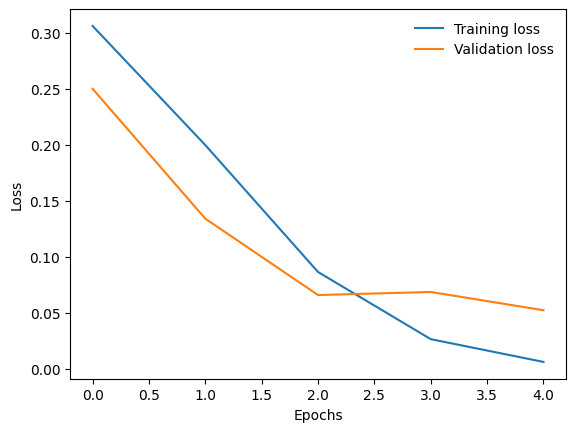

In [40]:
%matplotlib inline
plt.plot([i for i in range(len(train_loss))], train_loss, label = 'Training loss')
plt.plot([i for i in range(len((val_loss)))], val_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [41]:
all_predictions = []
all_references = []
for batch in val_loader:
    inputs = batch['inputs'].to(device)
    labels = batch['labels'].to(device)
    with torch.no_grad():
        outputs = model(inputs, labels=labels)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim= -1)
    all_predictions.extend(predictions.cpu().numpy())
    all_references.extend(batch['labels'].cpu().numpy())

In [42]:
print(confusion_matrix(all_predictions, all_references))
print('accuracy:{}'.format(accuracy_score(all_predictions, all_references)))
print('precision:{}'.format(precision_score(all_predictions, all_references ,average='weighted')))
print('recall:{}'.format(recall_score(all_predictions, all_references, average='weighted')))
print('f1-score:{}'.format(f1_score(all_predictions, all_references, average='weighted')))

[[2433   30]
 [  19  974]]
accuracy:0.9858217592592593
precision:0.9858922015964597
recall:0.9858217592592593
f1-score:0.9858449422112711


In [51]:
build_conf_matrix(all_references, all_predictions, 1)

array([[0.97011952, 0.02988048],
       [0.00774878, 0.99225122]])

In [52]:
model.save_pretrained("goida.pth")

## ResNet34

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [9]:
def load_split_train_test(datadir, valid_size = 0.2):
    train_trainsforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
    train_data = datasets.ImageFolder(datadir,transform=train_trainsforms)

    num_train = len(train_data)                               # Количество тренировочных наборов
    indices = list(range(num_train))                          # Указатель обучающего набора

    split = int(np.floor(valid_size * num_train))             # Получить 20% данных в качестве набора для проверки
    np.random.shuffle(indices)                                # Перемешать набор данных

    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]    # Получить обучающий набор, тестовый набор
    print(len(train_idx), len(test_idx))
    train_sampler = SubsetRandomSampler(train_idx)            # Disrupt обучающий набор, тестовый набор
    test_sampler  = SubsetRandomSampler(test_idx)

    # ============ Загрузчик данных: загрузка обучающего набора, тестового набора ===================
    train_loader = DataLoader(train_data,sampler=train_sampler,batch_size=64)
    test_loader = DataLoader(train_data,sampler=test_sampler,batch_size=64)
    return train_loader,test_loader

In [5]:
train_loader,test_loader = load_split_train_test(data_dir, 0.2)
print(train_loader.dataset.classes)
print(train_loader.__len__())
print(test_loader.__len__())

13824 3456
['AKR', 'not_AKR']
216
54


In [6]:
import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda")  # здесь вы можете продолжить, например,cuda:1 cuda:2... и т. д. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")
model = models.resnet34(pretrained=True)

"""
       Во-первых, мы должны заморозить предварительно обученные слои, чтобы они не передавались обратно во время обучения.
       Затем мы переопределяем последний полностью связанный слой, который является слоем, обученным с нашими изображениями.
                 Мы также создали критерии (функцию потерь) и выбрали оптимизатор (в данном случае Адам) и скорость обучения.
"""
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(nn.Linear(512,512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512,7),
                         nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(),lr=0.0001)
model.to(device)


epochs = 10
steps = 0
running_loss = 0
train_losses, test_losses = [],[]


for epoch in tqdm.tqdm(range(epochs)):
    for inputs,labels in train_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        out = model(inputs)
        loss = criterion(out,labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
        steps +=1

    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs,labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out2 = model(inputs)
            batch_loss = criterion(out2,labels)
            test_loss +=batch_loss.item()

            ps = torch.exp(out2)
            top_pred,top_class = ps.topk(1,dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f"Epoch {epoch+1}/{epochs}"
                  f"Train loss: {running_loss/len(train_loader):.3f}",
                  f"Test loss: {test_loss/len(test_loader):.3f} "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
    running_loss = 0
    model.train()

Running on the GPU


c:\My-University-Documents\diploma\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\My-University-Documents\diploma\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
 10%|█         | 1/10 [07:00<1:03:02, 420.28s/it]

Epoch 1/10Train loss: 0.516 Test loss: 0.371 Test accuracy: 0.840


 20%|██        | 2/10 [10:55<41:31, 311.45s/it]  

Epoch 2/10Train loss: 0.380 Test loss: 0.351 Test accuracy: 0.855


 30%|███       | 3/10 [14:46<32:01, 274.50s/it]

Epoch 3/10Train loss: 0.358 Test loss: 0.342 Test accuracy: 0.862


 40%|████      | 4/10 [18:36<25:41, 256.93s/it]

Epoch 4/10Train loss: 0.349 Test loss: 0.332 Test accuracy: 0.863


 50%|█████     | 5/10 [22:26<20:36, 247.27s/it]

Epoch 5/10Train loss: 0.339 Test loss: 0.327 Test accuracy: 0.867


 60%|██████    | 6/10 [26:15<16:04, 241.21s/it]

Epoch 6/10Train loss: 0.332 Test loss: 0.324 Test accuracy: 0.873


 70%|███████   | 7/10 [30:04<11:51, 237.27s/it]

Epoch 7/10Train loss: 0.325 Test loss: 0.321 Test accuracy: 0.867


 80%|████████  | 8/10 [33:53<07:49, 234.60s/it]

Epoch 8/10Train loss: 0.317 Test loss: 0.312 Test accuracy: 0.871


 90%|█████████ | 9/10 [37:43<03:53, 233.04s/it]

Epoch 9/10Train loss: 0.309 Test loss: 0.307 Test accuracy: 0.875


100%|██████████| 10/10 [41:31<00:00, 249.18s/it]

Epoch 10/10Train loss: 0.303 Test loss: 0.329 Test accuracy: 0.866


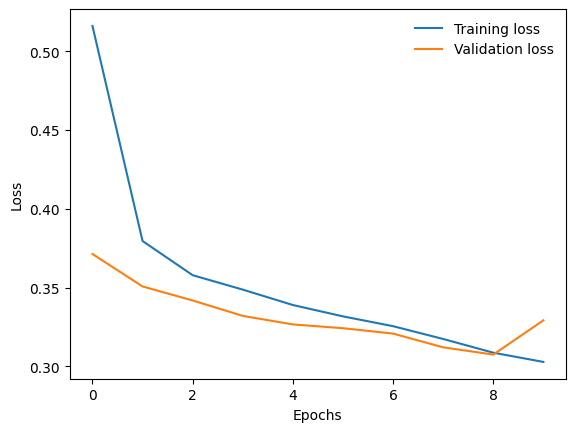

In [7]:
%matplotlib inline
plt.plot([i for i in range(epochs)], train_losses, label = 'Training loss')
plt.plot([i for i in range(epochs)], test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f"loss.png", dpi=300)
plt.show()

In [8]:
l = []
c = []
model.eval()
with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        out2 = model(inputs)

        ps = torch.exp(out2)
        top_pred, top_class = ps.topk(1,dim=1)
        for i in range(len(top_class)):
            l.append(labels[i].item())
            c.append(top_class[i].item())

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

print(confusion_matrix(l, c))
print('accuracy:{}'.format(accuracy_score(l, c)))
print('precision:{}'.format(precision_score(l, c,average='weighted')))
print('recall:{}'.format(recall_score(l, c,average='weighted')))
print('f1-score:{}'.format(f1_score(l, c,average='weighted')))

[[ 840  140]
 [ 323 2153]]
accuracy:0.8660300925925926
precision:0.8775033147984196
recall:0.8660300925925926
f1-score:0.869179824424598


In [12]:
build_conf_matrix(l, c, 0)

array([[0.85714286, 0.14285714],
       [0.13045234, 0.86954766]])

## DenseNet

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [14]:
data_dir = "cv_classification_32"

In [15]:
train_loader,test_loader = load_split_train_test(data_dir, 0.2)
print(train_loader.dataset.classes)
print(train_loader.__len__())
print(test_loader.__len__())

13824 3456
['AKR', 'not_AKR']
216
54


In [16]:
import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda")  # здесь вы можете продолжить, например,cuda:1 cuda:2... и т. д. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet161', pretrained=True)
model.classifier = nn.Linear(2208, 1)

for param in model.parameters():
    param.requires_grad = True

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)
model.to(device)


epochs = 5
steps = 0
running_loss = 0
train_losses,test_losses = [],[]


for epoch in tqdm.tqdm(range(epochs)):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        out = model(inputs)
        # Приведите метки к правильному формату
        labels = labels.float()  # Убедитесь, что метки имеют тип float
        loss = criterion(out.view(-1), labels)  # Измените форму выходов

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        steps += 1

    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out2 = model(inputs)
            labels = labels.float()  # Убедитесь, что метки имеют тип float
            batch_loss = criterion(out2.view(-1), labels)  # Измените форму выходов

            test_loss += batch_loss.item()

            ps = torch.sigmoid(out2)  # Используйте сигмоид для получения вероятностей
            top_pred = (ps > 0.5).int()  # Пороговое значение 0.5 для предсказаний
            equals = top_pred == labels.view(*top_pred.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(running_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))

    print(f"Epoch {epoch + 1}/{epochs} "
          f"Train loss: {running_loss / len(train_loader):.3f}, "
          f"Test loss: {test_loss / len(test_loader):.3f}, "
          f"Test accuracy: {accuracy / len(test_loader):.3f}")
    
    running_loss = 0
    model.train()

Running on the GPU


Using cache found in C:\Users\Иван/.cache\torch\hub\pytorch_vision_v0.10.0
c:\My-University-Documents\diploma\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\My-University-Documents\diploma\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
 20%|██        | 1/5 [1:23:55<5:35:43, 5035.75s/it]

Epoch 1/5 Train loss: 0.222, Test loss: 0.113, Test accuracy: 0.961


 40%|████      | 2/5 [2:42:18<4:01:58, 4839.60s/it]

Epoch 2/5 Train loss: 0.066, Test loss: 0.063, Test accuracy: 0.979


 60%|██████    | 3/5 [4:01:19<2:39:49, 4794.67s/it]

Epoch 3/5 Train loss: 0.035, Test loss: 0.067, Test accuracy: 0.977


 80%|████████  | 4/5 [5:18:41<1:18:54, 4734.35s/it]

Epoch 4/5 Train loss: 0.024, Test loss: 0.039, Test accuracy: 0.986


100%|██████████| 5/5 [6:36:00<00:00, 4752.09s/it]  

Epoch 5/5 Train loss: 0.015, Test loss: 0.052, Test accuracy: 0.984


In [ ]:
torch.cuda.empty_cache()

In [ ]:
import gc

gc.collect()

torch.cuda.empty_cache()

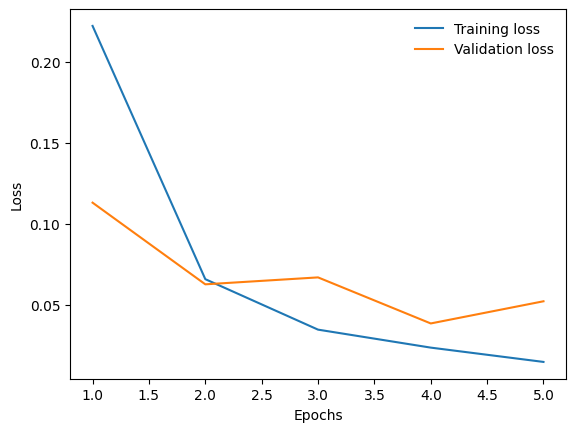

In [17]:
plt.plot([i for i in range(1, epochs + 1)], train_losses, label = 'Training loss')
plt.plot([i for i in range(1, epochs + 1)], test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f"loss.png", dpi=300)
plt.show()

In [18]:
l = []
c = []
model.eval()
with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        out2 = model(inputs)

        ps = torch.exp(out2)
        top_pred, top_class = ps.topk(1,dim=1)
        for i in range(len(top_class)):
            l.append(labels[i].item())
            c.append(top_class[i].item())

In [19]:
print(confusion_matrix(l, c))
print('accuracy:{}'.format(accuracy_score(l, c)))
print('precision:{}'.format(precision_score(l, c,average='weighted')))
print('recall:{}'.format(recall_score(l, c,average='weighted')))
print('f1-score:{}'.format(f1_score(l, c,average='weighted')))

[[ 968    0]
 [2488    0]]
accuracy:0.2800925925925926
precision:0.07845186042524006
recall:0.2800925925925926
f1-score:0.1225721652936843


c:\My-University-Documents\diploma\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
build_conf_matrix(l, c, 1)

array([[0., 1.],
       [0., 1.]])

## Xception

In [ ]:
!pip install timm

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 3.0 MB/s eta 0:00:01
   ------------------------------------ --- 2.1/2.3 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 3.3 MB/s eta 0:00:00


In [6]:
import timm
model = timm.create_model('xception', pretrained=True, num_classes=2)
model.eval()

c:\My-University-Documents\diploma\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\My-University-Documents\diploma\.venv\lib\site-packages\timm\models\_factory.py:117: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(


Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [10]:
# data_dir = '/home/qqqiwi/docs/diploma/data/data_1 (2020)/cv_classification'
train_loader,test_loader = load_split_train_test(data_dir, 0.2)
print(train_loader.dataset.classes)
print(train_loader.__len__())
print(test_loader.__len__())

13824 3456
['AKR', 'not_AKR']
216
54


In [11]:
import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda")  # здесь вы можете продолжить, например,cuda:1 cuda:2... и т. д. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")


for param in model.parameters():
    param.requires_grad = True


criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)
model.to(device)


epochs = 10
steps = 0
running_loss = 0
train_losses,test_losses = [],[]


for epoch in tqdm.tqdm(range(epochs)):
    for inputs,labels in train_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        out = model(inputs)
        log_out = torch.nn.functional.log_softmax(out)
        loss = criterion(log_out,labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
        steps +=1

    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs,labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out2 = model(inputs)
            log_out2 = torch.nn.functional.log_softmax(out2)
            batch_loss = criterion(log_out2,labels)
            test_loss += batch_loss.item()

            ps = torch.exp(out2)
            top_pred,top_class = ps.topk(1,dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f"Epoch {epoch+1}/{epochs}"
                  f"Train loss: {running_loss/len(train_loader):.3f}",
                  f"Test loss: {test_loss/len(test_loader):.3f} "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
    running_loss = 0
    model.train()

Running on the GPU


  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\Иван\AppData\Local\Temp\ipykernel_37824\909633248.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_out = torch.nn.functional.log_softmax(out)
C:\Users\Иван\AppData\Local\Temp\ipykernel_37824\909633248.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_out2 = torch.nn.functional.log_softmax(out2)
 10%|█         | 1/10 [37:52<5:40:56, 2272.94s/it]

Epoch 1/10Train loss: 0.310 Test loss: 0.235 Test accuracy: 0.912


 20%|██        | 2/10 [1:12:32<4:47:54, 2159.37s/it]

Epoch 2/10Train loss: 0.186 Test loss: 0.048 Test accuracy: 0.983


 30%|███       | 3/10 [1:49:41<4:15:37, 2191.00s/it]

Epoch 3/10Train loss: 0.019 Test loss: 0.024 Test accuracy: 0.991


 40%|████      | 4/10 [2:26:37<3:40:04, 2200.71s/it]

Epoch 4/10Train loss: 0.009 Test loss: 0.029 Test accuracy: 0.992


 50%|█████     | 5/10 [3:04:03<3:04:46, 2217.25s/it]

Epoch 5/10Train loss: 0.013 Test loss: 0.026 Test accuracy: 0.993


 60%|██████    | 6/10 [3:42:28<2:29:48, 2247.17s/it]

Epoch 6/10Train loss: 0.015 Test loss: 0.015 Test accuracy: 0.996


 70%|███████   | 7/10 [4:26:05<1:58:24, 2368.01s/it]

Epoch 7/10Train loss: 0.004 Test loss: 0.016 Test accuracy: 0.997


 80%|████████  | 8/10 [5:11:40<1:22:49, 2484.71s/it]

Epoch 8/10Train loss: 0.003 Test loss: 0.022 Test accuracy: 0.995


 90%|█████████ | 9/10 [5:57:37<42:49, 2569.88s/it]  

Epoch 9/10Train loss: 0.003 Test loss: 0.020 Test accuracy: 0.996


100%|██████████| 10/10 [6:41:42<00:00, 2410.27s/it]

Epoch 10/10Train loss: 0.011 Test loss: 0.079 Test accuracy: 0.977


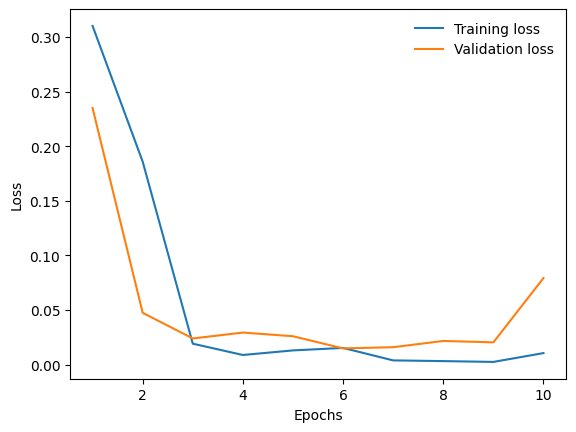

In [12]:
%matplotlib inline
plt.plot([i for i in range(1, epochs + 1)], train_losses, label = 'Training loss')
plt.plot([i for i in range(1, epochs + 1)], test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f"loss.png", dpi=300)
plt.show()

In [13]:
l = []
c = []
model.eval()
with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        out2 = model(inputs)

        ps = torch.exp(out2)
        top_pred, top_class = ps.topk(1,dim=1)
        for i in range(len(top_class)):
            l.append(labels[i].item())
            c.append(top_class[i].item())

In [16]:
print(confusion_matrix(l, c))
print('accuracy:{}'.format(accuracy_score(l, c)))
print('precision:{}'.format(precision_score(l, c,average='weighted')))
print('recall:{}'.format(recall_score(l, c,average='weighted')))
print('f1-score:{}'.format(f1_score(l, c,average='weighted')))

[[ 985   16]
 [  65 2390]]
accuracy:0.9765625
precision:0.9773459147270712
recall:0.9765625
f1-score:0.9767243424364571


In [19]:
build_conf_matrix(l, c, 1)

array([[0.97352342, 0.02647658],
       [0.01598402, 0.98401598]])

# Эксперимент (блок 16, 17k изображений)

```
window_length = 8
overlap = max(1, window_length // 2)
```

In [25]:
data_dir = 'cv_classification_16'

In [26]:
classes = os.listdir(data_dir)
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-384")
imgs = []
lbls = []
cnt = 0
class2lbl = {"AKR": 1, "not_AKR": 0}

c:\My-University-Documents\diploma\.venv\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [27]:
for cl in classes:
    class_path = data_dir + '/' + cl
    images = os.listdir(class_path)
    for image in images:
        try:
            input = PIL.Image.open(class_path + '/' + image).convert("RGB")
            imgs.append(feature_extractor(input, return_tensors="pt")['pixel_values'][0])
            lbls.append(class2lbl[cl])
        except:
            cnt += 1

In [28]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(imgs, lbls, test_size=.2, stratify=lbls)

In [29]:
cnt

0

In [30]:
class AKRDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {}
        item['inputs'] = self.images[idx]
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

In [31]:
train_data = AKRDataset(train_images, train_labels)
val_data = AKRDataset(val_images, val_labels)
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = DataLoader(val_data, batch_size=8, shuffle=True)

In [36]:
import torch
from tqdm.auto import tqdm
from transformers import ViTForImageClassification, AdamW, get_scheduler

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-384", num_labels=2, ignore_mismatched_sizes=True)

model.to(device)
model.train()
optim = AdamW(model.parameters(), lr=5e-5)
num_epoch = 5

losses_for_train = []
losses_for_val = []
num_training_steps = num_epoch * len(train_loader)
lr_scheduler = get_scheduler('linear',
                                optimizer=optim,
                                num_warmup_steps=0,
                                num_training_steps=num_training_steps)

for epoch in range(num_epoch):
    loop = tqdm(train_loader, leave=True)
    model.train()
    for batch in loop:
        inputs = batch['inputs'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(inputs, labels=labels)
        loss = outputs[0]
        loss.backward()
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())
        optim.step()
        losses_for_train.append(loss.item())
        lr_scheduler.step()
        optim.zero_grad()
    model.eval()

    for batch in val_loader:
        inputs = batch['inputs'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(inputs, labels=labels)
        loss = outputs[0]
        losses_for_val.append(loss.item())

Running on the GPU


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-384 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\My-University-Documents\diploma\.venv\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 4: 100%|██████████| 1792/1792 [39:42<00:00,  1.33s/it, loss=0.446] 


In [37]:
train_loss = []
val_loss = []
tl = losses_for_train[0]
for i in range(1, len(losses_for_train)):
    if i % (len(train_loader) - 1):
        tl+=losses_for_train[i]
    else:
        train_loss.append(tl / len(train_loader))
        tl = 0
tl = losses_for_val[0]
for i in range(1, len(losses_for_val)):
    if i % (len(val_loader) - 1):
        tl+=losses_for_val[i]
    else:
        val_loss.append(tl / len(val_loader))
        tl = 0


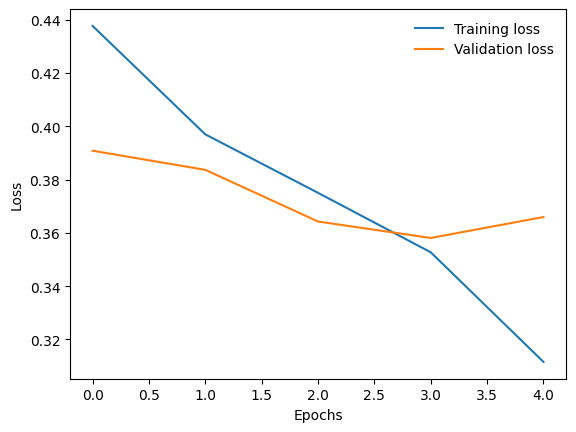

In [38]:
%matplotlib inline
plt.plot([i for i in range(len(train_loss))], train_loss, label = 'Training loss')
plt.plot([i for i in range(len((val_loss)))], val_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [39]:
all_predictions = []
all_references = []
for batch in val_loader:
    inputs = batch['inputs'].to(device)
    labels = batch['labels'].to(device)
    with torch.no_grad():
        outputs = model(inputs, labels=labels)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim= -1)
    all_predictions.extend(predictions.cpu().numpy())
    all_references.extend(batch['labels'].cpu().numpy())

In [40]:
print(confusion_matrix(all_predictions, all_references))
print('accuracy:{}'.format(accuracy_score(all_predictions, all_references)))
print('precision:{}'.format(precision_score(all_predictions, all_references ,average='weighted')))
print('recall:{}'.format(recall_score(all_predictions, all_references, average='weighted')))
print('f1-score:{}'.format(f1_score(all_predictions, all_references, average='weighted')))

[[2226  273]
 [ 288  796]]
accuracy:0.8434272955623779
precision:0.8428377600354753
recall:0.8434272955623779
f1-score:0.8431161227713941


In [41]:
build_conf_matrix(all_references, all_predictions, 1)

array([[0.74462114, 0.25537886],
       [0.11455847, 0.88544153]])

# Эксперимент (блок 16, 10k изображений)

```
window_length = 8
overlap = max(1, window_length // 2)
```

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

In [15]:
def build_conf_matrix(labels, predict, class_name):
    lab, pred = [], []
    for i in range(len(labels)):
        if predict[i] == class_name:
            pred.append(0)
        else:
            pred.append(1)
        if labels[i] == class_name:
            lab.append(0)
        else:
            lab.append(1)
    return confusion_matrix(lab, pred, normalize='true')


## ViT

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import PIL
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from transformers import ViTFeatureExtractor

c:\My-University-Documents\diploma\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
data_dir = 'cv_classification_16'

In [3]:
classes = os.listdir(data_dir)
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-384")
imgs = []
lbls = []
cnt = 0
class2lbl = {"AKR": 1, "not_AKR": 0}

c:\My-University-Documents\diploma\.venv\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [4]:
for cl in classes:
    class_path = data_dir + '/' + cl
    images = os.listdir(class_path)
    for image in images:
        try:
            input = PIL.Image.open(class_path + '/' + image).convert("RGB")
            imgs.append(feature_extractor(input, return_tensors="pt")['pixel_values'][0])
            lbls.append(class2lbl[cl])
        except:
            cnt += 1

In [6]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(imgs, lbls, test_size=.2, stratify=lbls)

In [5]:
cnt

0

In [7]:
class AKRDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {}
        item['inputs'] = self.images[idx]
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

In [8]:
train_data = AKRDataset(train_images, train_labels)
val_data = AKRDataset(val_images, val_labels)
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = DataLoader(val_data, batch_size=8, shuffle=True)

In [9]:
import torch
from tqdm.auto import tqdm
from transformers import ViTForImageClassification, AdamW, get_scheduler

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-384", num_labels=2, ignore_mismatched_sizes=True)

model.to(device)
model.train()
optim = AdamW(model.parameters(), lr=5e-5)
num_epoch = 5

losses_for_train = []
losses_for_val = []
num_training_steps = num_epoch * len(train_loader)
lr_scheduler = get_scheduler('linear',
                                optimizer=optim,
                                num_warmup_steps=0,
                                num_training_steps=num_training_steps)

for epoch in range(num_epoch):
    loop = tqdm(train_loader, leave=True)
    model.train()
    for batch in loop:
        inputs = batch['inputs'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(inputs, labels=labels)
        loss = outputs[0]
        loss.backward()
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())
        optim.step()
        losses_for_train.append(loss.item())
        lr_scheduler.step()
        optim.zero_grad()
    model.eval()

    for batch in val_loader:
        inputs = batch['inputs'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(inputs, labels=labels)
        loss = outputs[0]
        losses_for_val.append(loss.item())

Running on the GPU


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-384 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\My-University-Documents\diploma\.venv\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 4: 100%|██████████| 448/448 [24:28<00:00,  3.28s/it, loss=0.25]  


In [10]:
train_loss = []
val_loss = []
tl = losses_for_train[0]
for i in range(1, len(losses_for_train)):
    if i % (len(train_loader) - 1):
        tl+=losses_for_train[i]
    else:
        train_loss.append(tl / len(train_loader))
        tl = 0
tl = losses_for_val[0]
for i in range(1, len(losses_for_val)):
    if i % (len(val_loader) - 1):
        tl+=losses_for_val[i]
    else:
        val_loss.append(tl / len(val_loader))
        tl = 0


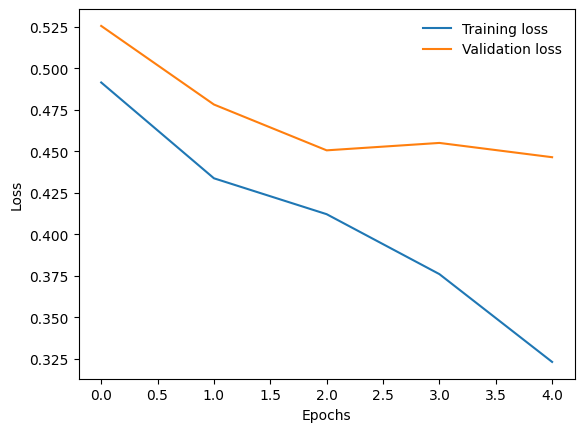

In [11]:
%matplotlib inline
plt.plot([i for i in range(len(train_loss))], train_loss, label = 'Training loss')
plt.plot([i for i in range(len((val_loss)))], val_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
all_predictions = []
all_references = []
for batch in val_loader:
    inputs = batch['inputs'].to(device)
    labels = batch['labels'].to(device)
    with torch.no_grad():
        outputs = model(inputs, labels=labels)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim= -1)
    all_predictions.extend(predictions.cpu().numpy())
    all_references.extend(batch['labels'].cpu().numpy())

In [16]:
print(confusion_matrix(all_predictions, all_references))
print('accuracy:{}'.format(accuracy_score(all_predictions, all_references)))
print('precision:{}'.format(precision_score(all_predictions, all_references ,average='weighted')))
print('recall:{}'.format(recall_score(all_predictions, all_references, average='weighted')))
print('f1-score:{}'.format(f1_score(all_predictions, all_references, average='weighted')))

[[510 116]
 [ 54 216]]
accuracy:0.8102678571428571
precision:0.8278197325777273
recall:0.8102678571428571
f1-score:0.8150955149501661


In [18]:
build_conf_matrix(all_references, all_predictions, 0)

array([[0.90425532, 0.09574468],
       [0.34939759, 0.65060241]])

## ResNet34

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [20]:
def load_split_train_test(datadir, valid_size = 0.2):
    train_trainsforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
    train_data = datasets.ImageFolder(datadir,transform=train_trainsforms)

    num_train = len(train_data)                               # Количество тренировочных наборов
    indices = list(range(num_train))                          # Указатель обучающего набора

    split = int(np.floor(valid_size * num_train))             # Получить 20% данных в качестве набора для проверки
    np.random.shuffle(indices)                                # Перемешать набор данных

    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]    # Получить обучающий набор, тестовый набор
    print(len(train_idx), len(test_idx))
    train_sampler = SubsetRandomSampler(train_idx)            # Disrupt обучающий набор, тестовый набор
    test_sampler  = SubsetRandomSampler(test_idx)

    # ============ Загрузчик данных: загрузка обучающего набора, тестового набора ===================
    train_loader = DataLoader(train_data,sampler=train_sampler,batch_size=64)
    test_loader = DataLoader(train_data,sampler=test_sampler,batch_size=64)
    return train_loader,test_loader

In [22]:
train_loader,test_loader = load_split_train_test(data_dir, 0.2)
print(train_loader.dataset.classes)
print(train_loader.__len__())
print(test_loader.__len__())

3583 895
['AKR', 'not_AKR']
56
14


In [28]:
import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda")  # здесь вы можете продолжить, например,cuda:1 cuda:2... и т. д. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")
model = models.resnet34(pretrained=True)

"""
       Во-первых, мы должны заморозить предварительно обученные слои, чтобы они не передавались обратно во время обучения.
       Затем мы переопределяем последний полностью связанный слой, который является слоем, обученным с нашими изображениями.
                 Мы также создали критерии (функцию потерь) и выбрали оптимизатор (в данном случае Адам) и скорость обучения.
"""
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(nn.Linear(512,512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512,7),
                         nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(),lr=0.0001)
model.to(device)


epochs = 20
steps = 0
running_loss = 0
train_losses, test_losses = [],[]


for epoch in tqdm.tqdm(range(epochs)):
    for inputs,labels in train_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        out = model(inputs)
        loss = criterion(out,labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
        steps +=1

    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs,labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out2 = model(inputs)
            batch_loss = criterion(out2,labels)
            test_loss +=batch_loss.item()

            ps = torch.exp(out2)
            top_pred,top_class = ps.topk(1,dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f"Epoch {epoch+1}/{epochs}"
                  f"Train loss: {running_loss/len(train_loader):.3f}",
                  f"Test loss: {test_loss/len(test_loader):.3f} "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
    running_loss = 0
    model.train()

Running on the GPU


c:\My-University-Documents\diploma\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\My-University-Documents\diploma\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  5%|▌         | 1/20 [00:50<16:00, 50.55s/it]

Epoch 1/20Train loss: 0.771 Test loss: 0.580 Test accuracy: 0.724


 10%|█         | 2/20 [01:39<14:52, 49.59s/it]

Epoch 2/20Train loss: 0.528 Test loss: 0.519 Test accuracy: 0.765


 15%|█▌        | 3/20 [02:28<13:56, 49.22s/it]

Epoch 3/20Train loss: 0.498 Test loss: 0.529 Test accuracy: 0.754


 20%|██        | 4/20 [03:16<13:03, 48.99s/it]

Epoch 4/20Train loss: 0.488 Test loss: 0.508 Test accuracy: 0.774


 25%|██▌       | 5/20 [04:05<12:13, 48.92s/it]

Epoch 5/20Train loss: 0.480 Test loss: 0.508 Test accuracy: 0.772


 30%|███       | 6/20 [04:54<11:24, 48.86s/it]

Epoch 6/20Train loss: 0.472 Test loss: 0.504 Test accuracy: 0.782


 35%|███▌      | 7/20 [05:43<10:34, 48.81s/it]

Epoch 7/20Train loss: 0.466 Test loss: 0.514 Test accuracy: 0.761


 40%|████      | 8/20 [06:31<09:45, 48.82s/it]

Epoch 8/20Train loss: 0.457 Test loss: 0.503 Test accuracy: 0.778


 45%|████▌     | 9/20 [07:20<08:57, 48.85s/it]

Epoch 9/20Train loss: 0.450 Test loss: 0.503 Test accuracy: 0.779


 50%|█████     | 10/20 [08:09<08:08, 48.83s/it]

Epoch 10/20Train loss: 0.448 Test loss: 0.502 Test accuracy: 0.774


 55%|█████▌    | 11/20 [08:58<07:19, 48.79s/it]

Epoch 11/20Train loss: 0.441 Test loss: 0.502 Test accuracy: 0.775


 60%|██████    | 12/20 [09:47<06:30, 48.80s/it]

Epoch 12/20Train loss: 0.437 Test loss: 0.511 Test accuracy: 0.771


 65%|██████▌   | 13/20 [10:36<05:41, 48.82s/it]

Epoch 13/20Train loss: 0.439 Test loss: 0.505 Test accuracy: 0.779


 70%|███████   | 14/20 [11:25<04:53, 48.93s/it]

Epoch 14/20Train loss: 0.438 Test loss: 0.502 Test accuracy: 0.781


 75%|███████▌  | 15/20 [12:14<04:04, 48.90s/it]

Epoch 15/20Train loss: 0.438 Test loss: 0.500 Test accuracy: 0.778


 80%|████████  | 16/20 [13:02<03:15, 48.82s/it]

Epoch 16/20Train loss: 0.426 Test loss: 0.500 Test accuracy: 0.772


 85%|████████▌ | 17/20 [13:51<02:26, 48.78s/it]

Epoch 17/20Train loss: 0.423 Test loss: 0.503 Test accuracy: 0.779


 90%|█████████ | 18/20 [14:40<01:37, 48.74s/it]

Epoch 18/20Train loss: 0.421 Test loss: 0.501 Test accuracy: 0.782


 95%|█████████▌| 19/20 [15:28<00:48, 48.72s/it]

Epoch 19/20Train loss: 0.419 Test loss: 0.506 Test accuracy: 0.774


100%|██████████| 20/20 [16:17<00:00, 48.88s/it]

Epoch 20/20Train loss: 0.411 Test loss: 0.500 Test accuracy: 0.775


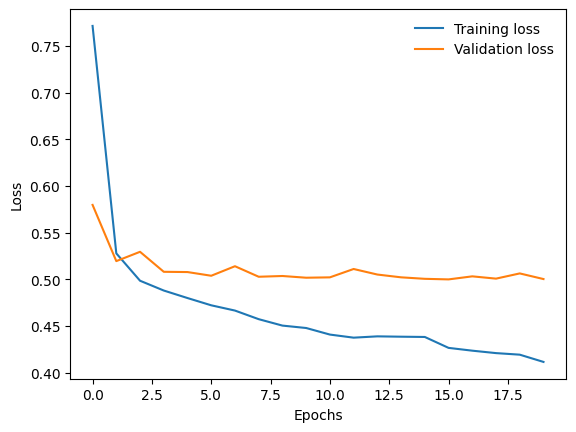

In [29]:
%matplotlib inline
plt.plot([i for i in range(epochs)], train_losses, label = 'Training loss')
plt.plot([i for i in range(epochs)], test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f"loss.png", dpi=300)
plt.show()

In [30]:
l = []
c = []
model.eval()
with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        out2 = model(inputs)

        ps = torch.exp(out2)
        top_pred, top_class = ps.topk(1,dim=1)
        for i in range(len(top_class)):
            l.append(labels[i].item())
            c.append(top_class[i].item())

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

print(confusion_matrix(l, c))
print('accuracy:{}'.format(accuracy_score(l, c)))
print('precision:{}'.format(precision_score(l, c,average='weighted')))
print('recall:{}'.format(recall_score(l, c,average='weighted')))
print('f1-score:{}'.format(f1_score(l, c,average='weighted')))

[[225 112]
 [ 89 469]]
accuracy:0.7754189944134078
precision:0.7730889683346417
recall:0.7754189944134078
f1-score:0.7737192408049902


In [32]:
build_conf_matrix(l, c, 0)

array([[0.66765579, 0.33234421],
       [0.15949821, 0.84050179]])

## DenseNet (4)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [4]:
data_dir = "cv_classification"

In [11]:
train_loader,test_loader = load_split_train_test(data_dir, 0.2)
print(train_loader.dataset.classes)
print(train_loader.__len__())
print(test_loader.__len__())

14828 3707
['AKR', 'not_AKR']
232
58


In [14]:
import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda")  # здесь вы можете продолжить, например,cuda:1 cuda:2... и т. д. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet161', pretrained=True)
model.classifier = nn.Linear(2208, 1)

for param in model.parameters():
    param.requires_grad = True

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)
model.to(device)


epochs = 5
steps = 0
running_loss = 0
train_losses,test_losses = [],[]


for epoch in tqdm.tqdm(range(epochs)):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        out = model(inputs)
        # Приведите метки к правильному формату
        labels = labels.float()  # Убедитесь, что метки имеют тип float
        loss = criterion(out.view(-1), labels)  # Измените форму выходов

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        steps += 1

    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out2 = model(inputs)
            labels = labels.float()  # Убедитесь, что метки имеют тип float
            batch_loss = criterion(out2.view(-1), labels)  # Измените форму выходов

            test_loss += batch_loss.item()

            ps = torch.sigmoid(out2)  # Используйте сигмоид для получения вероятностей
            top_pred = (ps > 0.5).int()  # Пороговое значение 0.5 для предсказаний
            equals = top_pred == labels.view(*top_pred.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(running_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))

    print(f"Epoch {epoch + 1}/{epochs} "
          f"Train loss: {running_loss / len(train_loader):.3f}, "
          f"Test loss: {test_loss / len(test_loader):.3f}, "
          f"Test accuracy: {accuracy / len(test_loader):.3f}")
    
    running_loss = 0
    model.train()

Running on the CPU


Using cache found in C:\Users\Иван/.cache\torch\hub\pytorch_vision_v0.10.0
 20%|██        | 1/5 [1:42:51<6:51:27, 6171.89s/it]

Epoch 1/5 Train loss: 0.584, Test loss: 0.569, Test accuracy: 0.723


 40%|████      | 2/5 [3:10:44<4:42:09, 5643.14s/it]

Epoch 2/5 Train loss: 0.573, Test loss: 0.575, Test accuracy: 0.723


 60%|██████    | 3/5 [4:37:55<3:01:49, 5454.58s/it]

Epoch 3/5 Train loss: 0.570, Test loss: 0.568, Test accuracy: 0.723


 80%|████████  | 4/5 [6:04:27<1:29:10, 5350.97s/it]

Epoch 4/5 Train loss: 0.568, Test loss: 0.565, Test accuracy: 0.729


100%|██████████| 5/5 [7:34:41<00:00, 5456.38s/it]  

Epoch 5/5 Train loss: 0.567, Test loss: 0.570, Test accuracy: 0.726


In [19]:
torch.cuda.empty_cache()

In [11]:
import gc

gc.collect()

torch.cuda.empty_cache()

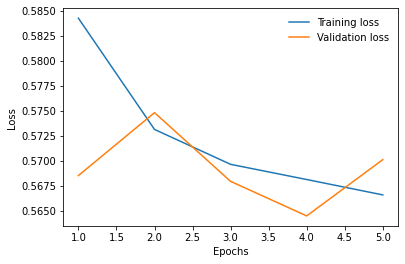

In [15]:
plt.plot([i for i in range(1, epochs + 1)], train_losses, label = 'Training loss')
plt.plot([i for i in range(1, epochs + 1)], test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f"loss.png", dpi=300)
plt.show()

In [16]:
l = []
c = []
model.eval()
with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        out2 = model(inputs)

        ps = torch.exp(out2)
        top_pred, top_class = ps.topk(1,dim=1)
        for i in range(len(top_class)):
            l.append(labels[i].item())
            c.append(top_class[i].item())

In [17]:
print(confusion_matrix(l, c))
print('accuracy:{}'.format(accuracy_score(l, c)))
print('precision:{}'.format(precision_score(l, c,average='weighted')))
print('recall:{}'.format(recall_score(l, c,average='weighted')))
print('f1-score:{}'.format(f1_score(l, c,average='weighted')))

[[1135    0]
 [2572    0]]
accuracy:0.3061775020231994
precision:0.09374466274516624
recall:0.3061775020231994
f1-score:0.143540464599889


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
build_conf_matrix(l, c, 1)

array([[0., 1.],
       [0., 1.]])

## Xception

In [34]:
!pip install timm

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 3.0 MB/s eta 0:00:01
   ------------------------------------ --- 2.1/2.3 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 3.3 MB/s eta 0:00:00


In [35]:
import timm
model = timm.create_model('xception', pretrained=True, num_classes=2)
model.eval()

c:\My-University-Documents\diploma\.venv\lib\site-packages\timm\models\_factory.py:117: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(


Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [37]:
# data_dir = '/home/qqqiwi/docs/diploma/data/data_1 (2020)/cv_classification'
train_loader,test_loader = load_split_train_test(data_dir, 0.2)
print(train_loader.dataset.classes)
print(train_loader.__len__())
print(test_loader.__len__())

3583 895
['AKR', 'not_AKR']
56
14


In [38]:
import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda")  # здесь вы можете продолжить, например,cuda:1 cuda:2... и т. д. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")


for param in model.parameters():
    param.requires_grad = True


criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)
model.to(device)


epochs = 10
steps = 0
running_loss = 0
train_losses,test_losses = [],[]


for epoch in tqdm.tqdm(range(epochs)):
    for inputs,labels in train_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        out = model(inputs)
        log_out = torch.nn.functional.log_softmax(out)
        loss = criterion(log_out,labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
        steps +=1

    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs,labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out2 = model(inputs)
            log_out2 = torch.nn.functional.log_softmax(out2)
            batch_loss = criterion(log_out2,labels)
            test_loss += batch_loss.item()

            ps = torch.exp(out2)
            top_pred,top_class = ps.topk(1,dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f"Epoch {epoch+1}/{epochs}"
                  f"Train loss: {running_loss/len(train_loader):.3f}",
                  f"Test loss: {test_loss/len(test_loader):.3f} "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
    running_loss = 0
    model.train()

Running on the GPU


  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\Иван\AppData\Local\Temp\ipykernel_424\909633248.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_out = torch.nn.functional.log_softmax(out)
C:\Users\Иван\AppData\Local\Temp\ipykernel_424\909633248.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_out2 = torch.nn.functional.log_softmax(out2)
 10%|█         | 1/10 [15:35<2:20:23, 935.98s/it]

Epoch 1/10Train loss: 0.525 Test loss: 0.471 Test accuracy: 0.810


 20%|██        | 2/10 [33:11<2:14:10, 1006.35s/it]

Epoch 2/10Train loss: 0.510 Test loss: 0.454 Test accuracy: 0.809


 30%|███       | 3/10 [49:07<1:54:44, 983.48s/it] 

Epoch 3/10Train loss: 0.338 Test loss: 0.429 Test accuracy: 0.828


 40%|████      | 4/10 [1:05:01<1:37:10, 971.70s/it]

Epoch 4/10Train loss: 0.184 Test loss: 0.472 Test accuracy: 0.819


 50%|█████     | 5/10 [1:20:55<1:20:26, 965.29s/it]

Epoch 5/10Train loss: 0.091 Test loss: 0.587 Test accuracy: 0.794


 60%|██████    | 6/10 [1:35:25<1:02:11, 932.88s/it]

Epoch 6/10Train loss: 0.078 Test loss: 0.617 Test accuracy: 0.796


 70%|███████   | 7/10 [1:48:44<44:27, 889.13s/it]  

Epoch 7/10Train loss: 0.057 Test loss: 0.665 Test accuracy: 0.825


 80%|████████  | 8/10 [2:03:21<29:30, 885.16s/it]

Epoch 8/10Train loss: 0.046 Test loss: 0.759 Test accuracy: 0.826


 90%|█████████ | 9/10 [2:16:38<14:17, 857.87s/it]

Epoch 9/10Train loss: 0.039 Test loss: 0.732 Test accuracy: 0.830


100%|██████████| 10/10 [2:29:55<00:00, 899.55s/it]

Epoch 10/10Train loss: 0.019 Test loss: 0.671 Test accuracy: 0.829


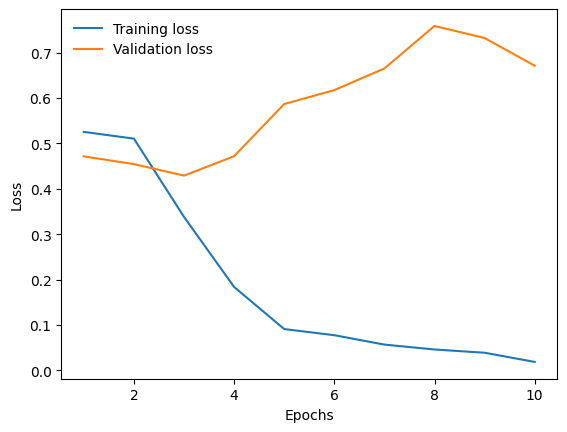

In [39]:
%matplotlib inline
plt.plot([i for i in range(1, epochs + 1)], train_losses, label = 'Training loss')
plt.plot([i for i in range(1, epochs + 1)], test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f"loss.png", dpi=300)
plt.show()

In [40]:
l = []
c = []
model.eval()
with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        out2 = model(inputs)

        ps = torch.exp(out2)
        top_pred, top_class = ps.topk(1,dim=1)
        for i in range(len(top_class)):
            l.append(labels[i].item())
            c.append(top_class[i].item())

In [41]:
print(confusion_matrix(l, c))
print('accuracy:{}'.format(accuracy_score(l, c)))
print('precision:{}'.format(precision_score(l, c,average='weighted')))
print('recall:{}'.format(recall_score(l, c,average='weighted')))
print('f1-score:{}'.format(f1_score(l, c,average='weighted')))

[[236  85]
 [ 68 506]]
accuracy:0.829050279329609
precision:0.8275333819902677
recall:0.829050279329609
f1-score:0.827972635768576


In [42]:
build_conf_matrix(l, c, 0)

array([[0.73520249, 0.26479751],
       [0.1184669 , 0.8815331 ]])

# Эксперимент 2 - 18.5k изображений - блок длины 4

## ViT

In [ ]:
!pip install transformers
!pip install pandas

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/10.0 MB 3.9 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/10.0 MB 5.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/10.0 MB 5.5 MB/s eta 0:00:02
   ------------------- -------------------- 5.0/10.0 MB 5.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.0/10.0 MB 5.9 MB/s eta 0:00:01
   ---------------------- ----------------- 5.8/10.0 MB 4.5 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/10.0 MB 4.3 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/10.0 MB 3.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/10.0 MB 3.8 MB/s eta 0:00:01
   ----------------------------

ERROR: Could not find a version that satisfies the requirement pip3 (from versions: none)
ERROR: No matching distribution found for pip3


In [7]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 3.6 MB/s eta 0:12:29
     ---------------------------------------- 0.0/2.7 GB 8.1 MB/s eta 0:05:34
     ---------------------------------------- 0.0/2.7 GB 7.0 MB/s eta 0:06:26
     ---------------------------------------- 0.0/2.7 GB 5.5 MB/s eta 0:08:12
     ---------------------------------------- 0.0/2.7 GB 4.8 MB/s eta 0:09:23
     ---------------------------------------- 0.0/2.7 GB 4.2 MB/s eta 0:10:35
     ---------------------------------------- 0.0/2.7 GB 4.1 MB/s eta 0:10:57
     ---------------------------------------- 0.0/2.7 GB 3.9 MB/s eta 0:11:36
     ---------------------------------------- 0.0/2.7 GB 3.7 MB/s eta 0:12:03
     ---------------------------------------- 0.0/2.7 GB 3.6 MB/s eta 0:12:22
     --------------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import PIL
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from transformers import ViTFeatureExtractor, DeiTFeatureExtractor

c:\My-University-Documents\diploma\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
data_dir = 'cv_classification'

In [ ]:
feature_extractor = DeiTFeatureExtractor.from_pretrained("facebook/deit-base-distilled-patch16-384")

In [ ]:
classes = os.listdir(data_dir)
# feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-384")
imgs = []
lbls = []
cnt = 0
class2lbl = {"AKR": 1, "not_AKR": 0}

/home/qqqiwi/docs/diploma/.venv/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
for cl in classes:
    class_path = data_dir + '/' + cl
    images = os.listdir(class_path)
    for image in images:
        try:
            input = PIL.Image.open(class_path + '/' + image).convert("RGB")
            imgs.append(feature_extractor(input, return_tensors="pt")['pixel_values'][0])
            lbls.append(class2lbl[cl])
        except:
            cnt += 1

In [ ]:
cnt

0

In [ ]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(imgs, lbls, test_size=.2, stratify=lbls)

In [ ]:
class AKRDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {}
        item['inputs'] = self.images[idx]
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

In [ ]:
train_data = AKRDataset(train_images, train_labels)
val_data = AKRDataset(val_images, val_labels)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=True)

In [16]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [27]:
import torch
from tqdm.auto import tqdm
from transformers import ViTForImageClassification, AdamW, get_scheduler

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-384", num_labels=2, ignore_mismatched_sizes=True)

model.to(device)
model.train()
optim = AdamW(model.parameters(), lr=5e-5)
num_epoch = 11

losses_for_train = []
losses_for_val = []
num_training_steps = num_epoch * len(train_loader)
lr_scheduler = get_scheduler('linear',
                                optimizer=optim,
                                num_warmup_steps=0,
                                num_training_steps=num_training_steps)

for epoch in range(num_epoch):
    loop = tqdm(train_loader, leave=True)
    model.train()
    for batch in loop:
        inputs = batch['inputs'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(inputs, labels=labels)
        loss = outputs[0]
        loss.backward()
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())
        optim.step()
        losses_for_train.append(loss.item())
        lr_scheduler.step()
        optim.zero_grad()
    model.eval()

    for batch in val_loader:
        inputs = batch['inputs'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(inputs, labels=labels)
        loss = outputs[0]
        losses_for_val.append(loss.item())

Running on the GPU


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-384 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/qqqiwi/docs/diploma/.venv/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 10: 100%|██████████| 927/927 [11:01<00:00,  1.40it/s, loss=0.427]


In [28]:
train_loss = []
val_loss = []
tl = losses_for_train[0]
for i in range(1, len(losses_for_train)):
    if i % (len(train_loader) - 1):
        tl+=losses_for_train[i]
    else:
        train_loss.append(tl / len(train_loader))
        tl = 0
tl = losses_for_val[0]
for i in range(1, len(losses_for_val)):
    if i % (len(val_loader) - 1):
        tl+=losses_for_val[i]
    else:
        val_loss.append(tl / len(val_loader))
        tl = 0


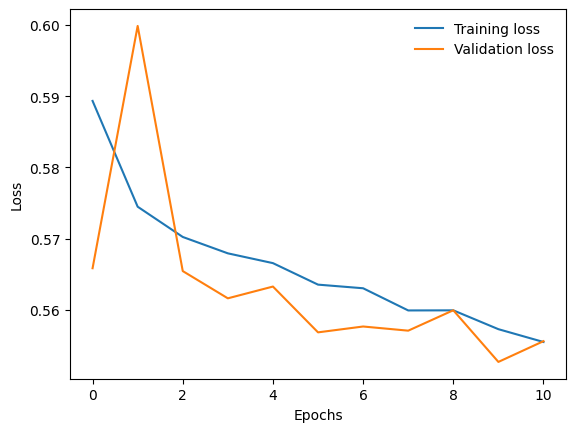

In [29]:
%matplotlib inline
plt.plot([i for i in range(len(train_loss))], train_loss, label = 'Training loss')
plt.plot([i for i in range(len((val_loss)))], val_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [30]:
all_predictions = []
all_references = []
for batch in val_loader:
    inputs = batch['inputs'].to(device)
    labels = batch['labels'].to(device)
    with torch.no_grad():
        outputs = model(inputs, labels=labels)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim= -1)
    all_predictions.extend(predictions.cpu().numpy())
    all_references.extend(batch['labels'].cpu().numpy())

### ViT

In [31]:
print(confusion_matrix(all_predictions, all_references))
print('accuracy:{}'.format(accuracy_score(all_predictions, all_references)))
print('precision:{}'.format(precision_score(all_predictions, all_references ,average='weighted')))
print('recall:{}'.format(recall_score(all_predictions, all_references, average='weighted')))
print('f1-score:{}'.format(f1_score(all_predictions, all_references, average='weighted')))

[[2373  783]
 [ 202  349]]
accuracy:0.7342864850283248
precision:0.8304013935710705
recall:0.7342864850283248
f1-score:0.7666820650860227


In [32]:
build_conf_matrix(all_references, all_predictions, 1)

array([[0.30830389, 0.69169611],
       [0.0784466 , 0.9215534 ]])

### DeiT

## ResNet34

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [34]:
def load_split_train_test(datadir, valid_size = 0.2):
    train_trainsforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
    train_data = datasets.ImageFolder(datadir,transform=train_trainsforms)

    num_train = len(train_data)                               # Количество тренировочных наборов
    indices = list(range(num_train))                          # Указатель обучающего набора

    split = int(np.floor(valid_size * num_train))             # Получить 20% данных в качестве набора для проверки
    np.random.shuffle(indices)                                # Перемешать набор данных

    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]    # Получить обучающий набор, тестовый набор
    print(len(train_idx), len(test_idx))
    train_sampler = SubsetRandomSampler(train_idx)            # Disrupt обучающий набор, тестовый набор
    test_sampler  = SubsetRandomSampler(test_idx)

    # ============ Загрузчик данных: загрузка обучающего набора, тестового набора ===================
    train_loader = DataLoader(train_data,sampler=train_sampler,batch_size=64)
    test_loader = DataLoader(train_data,sampler=test_sampler,batch_size=64)
    return train_loader,test_loader

In [35]:
train_loader,test_loader = load_split_train_test(data_dir, 0.2)
print(train_loader.dataset.classes)
print(train_loader.__len__())
print(test_loader.__len__())

14828 3707
['AKR', 'not_AKR']
232
58


In [36]:
import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda")  # здесь вы можете продолжить, например,cuda:1 cuda:2... и т. д. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")
model = models.resnet34(pretrained=True)

"""
       Во-первых, мы должны заморозить предварительно обученные слои, чтобы они не передавались обратно во время обучения.
       Затем мы переопределяем последний полностью связанный слой, который является слоем, обученным с нашими изображениями.
                 Мы также создали критерии (функцию потерь) и выбрали оптимизатор (в данном случае Адам) и скорость обучения.
"""
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(nn.Linear(512,512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512,7),
                         nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(),lr=0.0001)
model.to(device)


epochs = 20
steps = 0
running_loss = 0
train_losses, test_losses = [],[]


for epoch in tqdm.tqdm(range(epochs)):
    for inputs,labels in train_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        out = model(inputs)
        loss = criterion(out,labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
        steps +=1

    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs,labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out2 = model(inputs)
            batch_loss = criterion(out2,labels)
            test_loss +=batch_loss.item()

            ps = torch.exp(out2)
            top_pred,top_class = ps.topk(1,dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f"Epoch {epoch+1}/{epochs}"
                  f"Train loss: {running_loss/len(train_loader):.3f}",
                  f"Test loss: {test_loss/len(test_loader):.3f} "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
    running_loss = 0
    model.train()

Running on the GPU


/home/qqqiwi/docs/diploma/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/qqqiwi/docs/diploma/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  5%|▌         | 1/20 [02:31<47:53, 151.26s/it]

Epoch 1/20Train loss: 0.640 Test loss: 0.576 Test accuracy: 0.725


 10%|█         | 2/20 [05:14<47:31, 158.41s/it]

Epoch 2/20Train loss: 0.582 Test loss: 0.567 Test accuracy: 0.721


 15%|█▌        | 3/20 [07:56<45:21, 160.07s/it]

Epoch 3/20Train loss: 0.578 Test loss: 0.572 Test accuracy: 0.725


 20%|██        | 4/20 [10:23<41:17, 154.84s/it]

Epoch 4/20Train loss: 0.575 Test loss: 0.572 Test accuracy: 0.720


 25%|██▌       | 5/20 [12:48<37:47, 151.14s/it]

Epoch 5/20Train loss: 0.573 Test loss: 0.569 Test accuracy: 0.721


 30%|███       | 6/20 [15:17<35:06, 150.44s/it]

Epoch 6/20Train loss: 0.569 Test loss: 0.569 Test accuracy: 0.723


 35%|███▌      | 7/20 [18:07<33:59, 156.91s/it]

Epoch 7/20Train loss: 0.568 Test loss: 0.567 Test accuracy: 0.722


 40%|████      | 8/20 [20:48<31:37, 158.17s/it]

Epoch 8/20Train loss: 0.567 Test loss: 0.568 Test accuracy: 0.723


 45%|████▌     | 9/20 [23:13<28:14, 154.08s/it]

Epoch 9/20Train loss: 0.566 Test loss: 0.568 Test accuracy: 0.724


 50%|█████     | 10/20 [25:37<25:11, 151.12s/it]

Epoch 10/20Train loss: 0.567 Test loss: 0.567 Test accuracy: 0.727


 55%|█████▌    | 11/20 [28:03<22:23, 149.31s/it]

Epoch 11/20Train loss: 0.565 Test loss: 0.576 Test accuracy: 0.721


 60%|██████    | 12/20 [30:27<19:42, 147.83s/it]

Epoch 12/20Train loss: 0.566 Test loss: 0.567 Test accuracy: 0.725


 65%|██████▌   | 13/20 [32:53<17:10, 147.15s/it]

Epoch 13/20Train loss: 0.564 Test loss: 0.567 Test accuracy: 0.729


 70%|███████   | 14/20 [35:17<14:37, 146.18s/it]

Epoch 14/20Train loss: 0.563 Test loss: 0.566 Test accuracy: 0.726


 75%|███████▌  | 15/20 [37:44<12:12, 146.45s/it]

Epoch 15/20Train loss: 0.564 Test loss: 0.570 Test accuracy: 0.723


 80%|████████  | 16/20 [40:10<09:45, 146.39s/it]

Epoch 16/20Train loss: 0.562 Test loss: 0.569 Test accuracy: 0.728


 85%|████████▌ | 17/20 [42:38<07:20, 146.94s/it]

Epoch 17/20Train loss: 0.562 Test loss: 0.567 Test accuracy: 0.725


 90%|█████████ | 18/20 [45:03<04:52, 146.19s/it]

Epoch 18/20Train loss: 0.562 Test loss: 0.569 Test accuracy: 0.725


 95%|█████████▌| 19/20 [47:28<02:25, 145.82s/it]

Epoch 19/20Train loss: 0.560 Test loss: 0.568 Test accuracy: 0.724


100%|██████████| 20/20 [49:51<00:00, 149.56s/it]

Epoch 20/20Train loss: 0.561 Test loss: 0.568 Test accuracy: 0.724


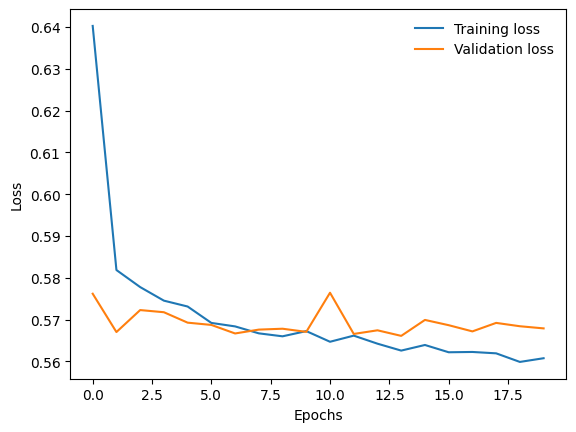

In [37]:
%matplotlib inline
plt.plot([i for i in range(epochs)], train_losses, label = 'Training loss')
plt.plot([i for i in range(epochs)], test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f"loss.png", dpi=300)
plt.show()

In [38]:
l = []
c = []
model.eval()
with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        out2 = model(inputs)

        ps = torch.exp(out2)
        top_pred, top_class = ps.topk(1,dim=1)
        for i in range(len(top_class)):
            l.append(labels[i].item())
            c.append(top_class[i].item())

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

print(confusion_matrix(l, c))
print('accuracy:{}'.format(accuracy_score(l, c)))
print('precision:{}'.format(precision_score(l, c,average='weighted')))
print('recall:{}'.format(recall_score(l, c,average='weighted')))
print('f1-score:{}'.format(f1_score(l, c,average='weighted')))

[[ 310  796]
 [ 229 2372]]
accuracy:0.7234960884812517
precision:0.696943567627409
recall:0.7234960884812517
f1-score:0.6894312324387321


In [41]:
build_conf_matrix(l, c, 0)

array([[0.28028933, 0.71971067],
       [0.08804306, 0.91195694]])

## Xception

In [23]:
import timm
model = timm.create_model('xception', pretrained=True, num_classes=2)
model.eval()

Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [24]:
train_loader,test_loader = load_split_train_test(data_dir, 0.2)
print(train_loader.dataset.classes)
print(train_loader.__len__())
print(test_loader.__len__())

14828 3707
['AKR', 'not_AKR']
232
58


In [25]:
import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda")  # здесь вы можете продолжить, например,cuda:1 cuda:2... и т. д. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")


for param in model.parameters():
    param.requires_grad = True


criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)
model.to(device)


epochs = 5
steps = 0
running_loss = 0
train_losses,test_losses = [],[]


for epoch in tqdm.tqdm(range(epochs)):
    for inputs,labels in train_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        out = model(inputs)
        log_out = torch.nn.functional.log_softmax(out)
        loss = criterion(log_out,labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
        steps +=1

    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs,labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out2 = model(inputs)
            log_out2 = torch.nn.functional.log_softmax(out2)
            batch_loss = criterion(log_out2,labels)
            test_loss += batch_loss.item()

            ps = torch.exp(out2)
            top_pred,top_class = ps.topk(1,dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f"Epoch {epoch+1}/{epochs}"
                  f"Train loss: {running_loss/len(train_loader):.3f}",
                  f"Test loss: {test_loss/len(test_loader):.3f} "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
    running_loss = 0
    model.train()

Running on the CPU


  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\Иван\AppData\Local\Temp\ipykernel_18116\1567859867.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_out = torch.nn.functional.log_softmax(out)
C:\Users\Иван\AppData\Local\Temp\ipykernel_18116\1567859867.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_out2 = torch.nn.functional.log_softmax(out2)
 20%|██        | 1/5 [48:35<3:14:22, 2915.74s/it]

Epoch 1/5Train loss: 0.596 Test loss: 0.567 Test accuracy: 0.734


 40%|████      | 2/5 [1:39:43<2:30:16, 3005.40s/it]

Epoch 2/5Train loss: 0.585 Test loss: 0.557 Test accuracy: 0.737


 60%|██████    | 3/5 [2:29:32<1:39:55, 2997.90s/it]

Epoch 3/5Train loss: 0.570 Test loss: 0.552 Test accuracy: 0.746


 80%|████████  | 4/5 [3:19:00<49:46, 2986.13s/it]  

Epoch 4/5Train loss: 0.568 Test loss: 0.553 Test accuracy: 0.739


100%|██████████| 5/5 [4:08:28<00:00, 2981.72s/it]

Epoch 5/5Train loss: 0.562 Test loss: 0.553 Test accuracy: 0.739


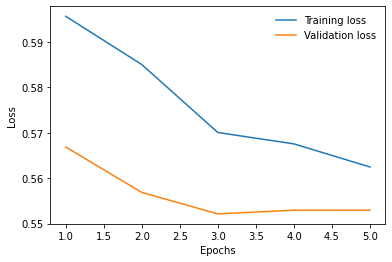

In [26]:
%matplotlib inline
plt.plot([i for i in range(1, epochs + 1)], train_losses, label = 'Training loss')
plt.plot([i for i in range(1, epochs + 1)], test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f"loss.png", dpi=300)
plt.show()

In [27]:
l = []
c = []
model.eval()
with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        out2 = model(inputs)

        ps = torch.exp(out2)
        top_pred, top_class = ps.topk(1,dim=1)
        for i in range(len(top_class)):
            l.append(labels[i].item())
            c.append(top_class[i].item())

In [28]:
print(confusion_matrix(l, c))
print('accuracy:{}'.format(accuracy_score(l, c)))
print('precision:{}'.format(precision_score(l, c,average='weighted')))
print('recall:{}'.format(recall_score(l, c,average='weighted')))
print('f1-score:{}'.format(f1_score(l, c,average='weighted')))

[[ 329  753]
 [ 213 2412]]
accuracy:0.7394119233881845
precision:0.7168222043455807
recall:0.7394119233881845
f1-score:0.7082393266383842


In [29]:
build_conf_matrix(l, c, 1)

array([[0.91885714, 0.08114286],
       [0.69593346, 0.30406654]])

# Эксперимент 3 - 18.5k изображений - блок длины 32